![](./lab%20header%20image.jpg)

#### **Subject**: Deep Learning | Experiment No - 02 (3rd YEAR CSE-AIML 2023-2024)

<img src="./Student%20Information.png" style="width: 100%;" alt="Student Information">


#### **Aim:** Implement CNN Algorithm on MNIST Dataset.

#### **Theory:** 


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\Kamran\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8239 - loss: 0.5289 - val_accuracy: 0.9766 - val_loss: 0.0807
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9804 - loss: 0.0622 - val_accuracy: 0.9818 - val_loss: 0.0623
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9865 - loss: 0.0408 - val_accuracy: 0.9884 - val_loss: 0.0395
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9897 - loss: 0.0306 - val_accuracy: 0.9902 - val_loss: 0.0365
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9873 - val_loss: 0.0423


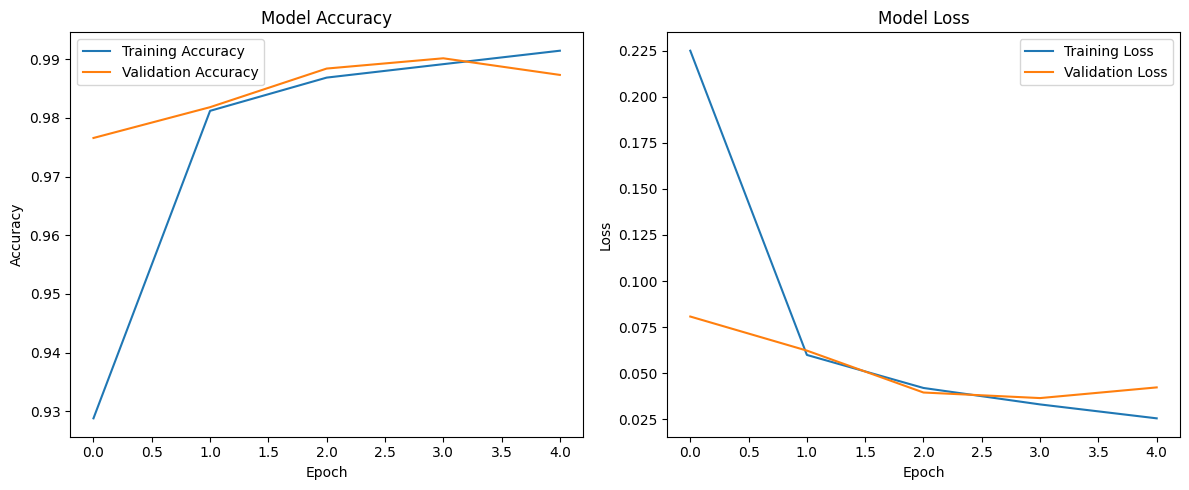

In [7]:
# Visualize training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9853 - loss: 0.0404
Test accuracy: 0.9897000193595886


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


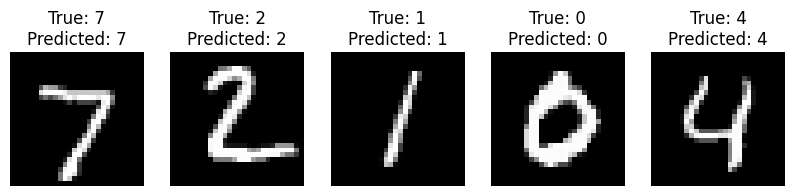

In [9]:
# Visualize some predictions
def plot_predictions(images, labels, num_samples=5):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {np.argmax(labels[i])}\nPredicted: {predicted_labels[i]}')
        plt.axis('off')
    plt.show()

plot_predictions(test_images[:5], test_labels[:5])

#### **Conclusion:**

<div style="float: right; border: 1px solid black; display: inline-block; padding: 10px; text-align: center">
    <br>
    <br>
    <span style="font-weight: bold;">Signature of Lab Incharge</span>
    <br>
    <span>(Prof. Poonam Kapse)</span> 
</div>